# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
X.isnull().sum(axis = 0)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

X_preds = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

X['Cluster'] = X_preds

X.Cluster.value_counts()

score = silhouette_score (X, X_preds, metric='euclidean')
score

0.5409037083349261

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [22]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])

kmeans = KMeans(n_clusters=5)

X_preds = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

X['Cluster'] = X_preds


score = silhouette_score (X, X_preds, metric='euclidean')
score

0.5490818464243359

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [21]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])

kmeans = KMeans(n_clusters=3)

X_preds = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

X['Cluster'] = X_preds

score = silhouette_score (X, X_preds, metric='euclidean')
score

0.5711458901803862

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

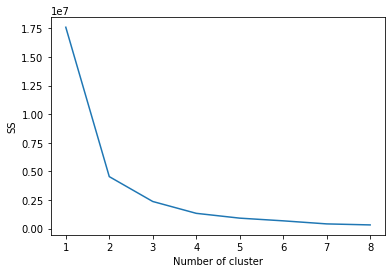

In [31]:
ss = {}
for k in range(1,9):
    kmeans = KMeans(n_clusters=k).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    ss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(ss.keys()), list(ss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SS")
plt.show()

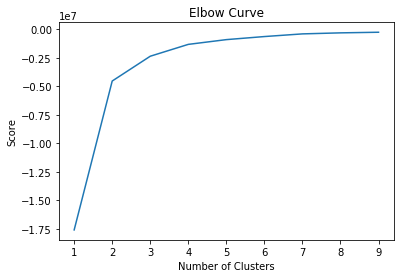

In [37]:

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [46]:
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(linkage='ward')
X_hier = hier_clust.fit(X)

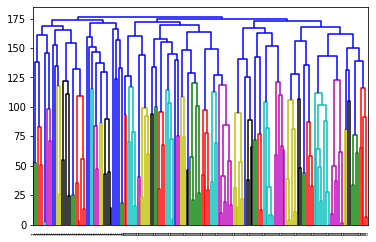

In [47]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(X_hier, labels=X_hier.labels_)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.